ایمپورت کردن کتابحانه ها

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


خواندن داده‌ها


In [4]:


data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print("train & val size:", len(data))
print("test size:", len(test_data))







train & val size: 150
test size: 50


# جدا کردن داده‌های اعتبارسنجی


In [5]:
from sklearn.model_selection import train_test_split
train_data, validation_data = train_test_split(data, test_size=50, random_state=42)


نمایش نمونه‌ای از داده‌های آموزشی


In [6]:
train_data.head()



,x1,x2,labels
96,1.364530,2.418171,0.0
105,-0.539465,-0.665129,1.0
66,-1.237597,0.739877,0.0
0,-1.872262,-0.999991,1.0
122,-0.412532,0.259302,1.0


In [7]:
print("train size:", len(train_data))
print("val size:", len(validation_data))


train size: 100
val size: 50


نمایش نمونه‌ای از داده‌های اعتبارسنجی


In [8]:
validation_data.head()

,x1,x2,labels
73,2.633861,2.183641,0.0
18,-3.078126,1.424294,0.0
118,0.983731,2.048528,0.0
78,-1.554930,-0.878871,1.0
76,-2.316528,-0.989079,1.0


In [9]:
X_train = train_data.to_numpy()[:, :2]
y_train = train_data.to_numpy()[:, 2]

X_val = validation_data.to_numpy()[:, :2]
y_val = validation_data.to_numpy()[:, 2]


# نرمال سسازی داده‌ها


In [10]:
X_train_mean = np.mean(X_train, axis=0, keepdims=True)
X_train_std = np.std(X_train, axis=0, keepdims=True)

In [11]:
Z_train = (X_train - X_train_mean) / X_train_std
Z_val = (X_val - X_train_mean) / X_train_std


# رسم نمودار داده‌ها

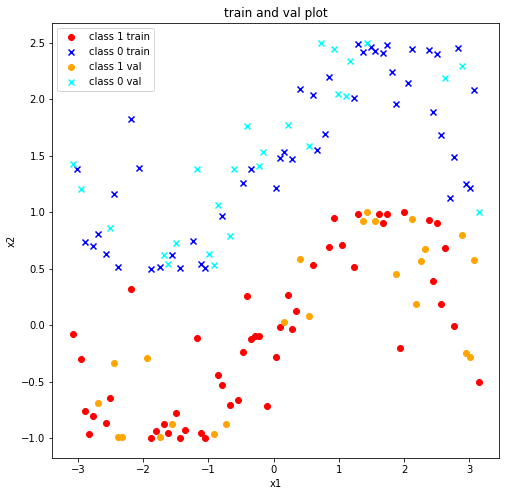

In [33]:

# جدا کردن داده‌ها بر اساس کلاس‌ها
class1_train = X_train[train_data['labels'] == 1]
class2_train = X_train[train_data['labels'] == 0]

class1_val = X_val[validation_data['labels'] == 1]
class2_val = X_val[validation_data['labels'] == 0]

plt.figure(figsize=(8,8))
# رسم نمودار
plt.scatter(class1_train[:, 0], class1_train[:, 1], marker='o', color='red', label='class 1 train')
plt.scatter(class2_train[:, 0], class2_train[:, 1], marker='x', color='blue', label='class 0 train')

# افزودن نمودارهای اعتبارسنجی
plt.scatter(class1_val[:, 0], class1_val[:, 1], marker='o', color='orange', label='class 1 val')
plt.scatter(class2_val[:, 0], class2_val[:, 1], marker='x', color='cyan', label='class 0 val')


# افزودن عنوان و برچسب‌ها
plt.title("train and val plot")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()



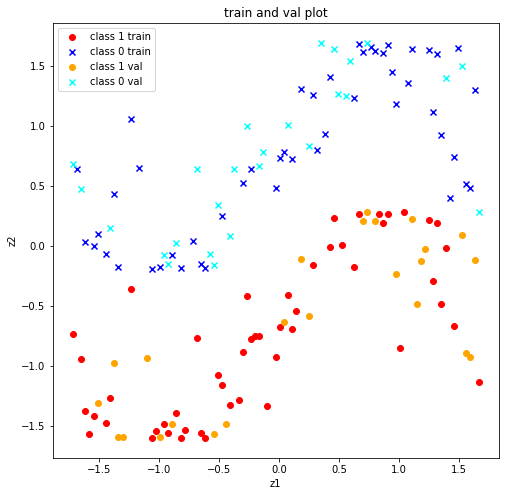

In [32]:

# جدا کردن داده‌ها بر اساس کلاس‌ها
class1_train = Z_train[train_data['labels'] == 1]
class2_train = Z_train[train_data['labels'] == 0]

class1_val = Z_val[validation_data['labels'] == 1]
class2_val = Z_val[validation_data['labels'] == 0]

plt.figure(figsize=(8,8))
# رسم نمودار
plt.scatter(class1_train[:, 0], class1_train[:, 1], marker='o', color='red', label='class 1 train')
plt.scatter(class2_train[:, 0], class2_train[:, 1], marker='x', color='blue', label='class 0 train')

# افزودن نمودارهای اعتبارسنجی
plt.scatter(class1_val[:, 0], class1_val[:, 1], marker='o', color='orange', label='class 1 val')
plt.scatter(class2_val[:, 0], class2_val[:, 1], marker='x', color='cyan', label='class 0 val')


# افزودن عنوان و برچسب‌ها
plt.title("train and val plot")
plt.xlabel('z1')
plt.ylabel('z2')
plt.legend()



الگوریتم پرسپترون

In [116]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, max_epochs=200):
        self.weights = np.random.rand(input_size + 1)  # +1 for the bias
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def activation_function(self, x):
        # Step function as the activation function
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        # Add bias term to the inputs
        inputs_with_bias = np.insert(inputs, 0, 1)
        # Calculate the dot product of weights and inputs
        result = np.dot(self.weights, inputs_with_bias)
        # Apply the activation function
        return self.activation_function(result)

    def fit(self, training_data, labels):
        for epoch in range(self.max_epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                # Update weights based on the error and input values
                self.weights += self.learning_rate * error * np.insert(inputs, 0, 1)

    def evaluate(self, test_data, labels):
        correct_predictions = 0
        predictions = []
        for inputs, label in zip(test_data, labels):
            prediction = self.predict(inputs)
            predictions.append(prediction)
            if prediction == label:
                correct_predictions += 1
        accuracy = correct_predictions / len(labels)
        return predictions, accuracy
    
    def plot_decision_boundary(self, train_data, train_labels, val_data, val_labels):
        plt.figure(dpi=200)
        # Plot training data
        plt.scatter(train_data[train_labels == 0][:, 0], train_data[train_labels == 0][:, 1], c='blue', marker='x', label='Class 0 (Train)')
        plt.scatter(train_data[train_labels == 1][:, 0], train_data[train_labels == 1][:, 1], c='red', marker='o', label='Class 1 (Train)')

        # Plot validation data
        plt.scatter(val_data[val_labels == 0][:, 0], val_data[val_labels == 0][:, 1], c='cyan', marker='x', label='Class 0 (Validation)')
        plt.scatter(val_data[val_labels == 1][:, 0], val_data[val_labels == 1][:, 1], c='orange', marker='o', label='Class 1 (Validation)')

        # Plot decision boundary
        x_min, x_max = np.min(train_data[:, 0]) - 0.1, np.max(train_data[:, 0]) + 0.1
        y_min, y_max = np.min(train_data[:, 1]) - 0.1, np.max(train_data[:, 1]) + 0.1

        # Plot decision boundary
        x_min, x_max = np.min(train_data[:, 0]) - 0.1, np.max(train_data[:, 0]) + 0.1
        y_min, y_max = np.min(train_data[:, 1]) - 0.1, np.max(train_data[:, 1]) + 0.1

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
        grid_data = np.c_[xx.ravel(), yy.ravel()]
        predictions = np.array([self.predict(point) for point in grid_data])

        plt.contourf(xx, yy, predictions.reshape(xx.shape), cmap=plt.cm.Paired, alpha=0.3)

        # Mark misclassified points with a larger size
        all_data = np.vstack((train_data, val_data))
        all_labels = np.concatenate((train_labels, val_labels))
        predictions_all = np.array([self.predict(point) for point in all_data])

        misclassified_indices = np.where(predictions_all != all_labels)[0]
        plt.scatter(all_data[misclassified_indices, 0], all_data[misclassified_indices, 1], s=80, edgecolors='black', facecolors='none', linewidths=2, label='Misclassified')

        plt.title("Perceptron Decision Boundary")
        plt.xlabel('z1')
        plt.ylabel('z2')
        plt.legend()
        plt.show()

# # Example usage:

# # Generate some random training data
# np.random.seed(42)
# training_data = np.random.rand(100, 2)
# labels = (training_data[:, 0] + training_data[:, 1] > 1).astype(int)

# # Create a Perceptron instance with 2 input features
# perceptron = Perceptron(input_size=2)

# # Train the Perceptron
# perceptron.fit(training_data, labels)

# # Test the Perceptron on new data
# test_data = np.random.rand(20, 2)
# test_labels = (test_data[:, 0] + test_data[:, 1] > 1).astype(int)

# _, accuracy = perceptron.evaluate(test_data, test_labels)
# print(f"Accuracy: {accuracy * 100:.2f}%")

# perceptron.plot_decision_boundary(training_data, labels, test_data, test_labels)


In [117]:
train_data.shape

(100, 3)

In [139]:
#from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix

# ایجاد یک مدل پرسپترون
perceptron_model = Perceptron(input_size=2)

# آموزش مدل روی داده‌های آموزش
perceptron_model.fit(Z_train, y_train)

# پیش‌بینی برچسب‌ها بر روی داده‌های آموزش
train_predictions, accuracy = perceptron_model.evaluate(Z_train, y_train)
train_accuracy = accuracy_score(y_train, train_predictions)
assert accuracy == train_accuracy

# پیش‌بینی برچسب‌ها بر روی داده‌های اعتبارسنجی
validation_predictions, accuracy = perceptron_model.evaluate(Z_val, y_val)
validation_accuracy = accuracy_score(y_val, validation_predictions)
assert accuracy == validation_accuracy

# گزارش دقت
print(f'train accuracy: {train_accuracy * 100:.2f}%')
print(f'validation: {validation_accuracy * 100:.2f}%')

confusion_matrix_val = confusion_matrix(y_val, validation_predictions)
print(confusion_matrix_val)

confusion_matrix_train = confusion_matrix(y_train, train_predictions)
print(confusion_matrix_train)

train accuracy: 96.00%
validation: 98.00%
[[25  1]
 [ 0 24]]
[[46  3]
 [ 1 50]]


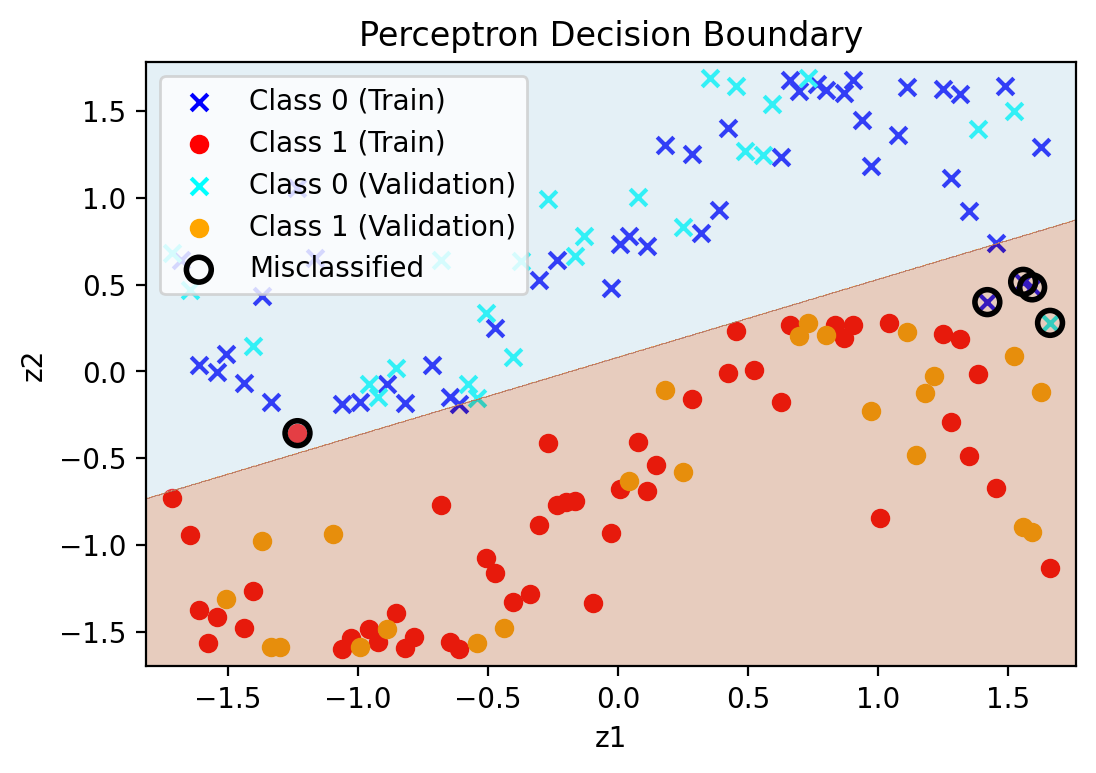

In [140]:
perceptron_model.plot_decision_boundary(Z_train, y_train, Z_val, y_val)
